In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data injestion + EDA

In [2]:
df = pd.read_csv("train.csv")
dfT = pd.read_csv("test.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.sample(frac=1)
#df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 277 to 545
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df2 = pd.read_csv("train.csv")
dfT2 = pd.read_csv("test.csv")
df2.drop("Sex", axis = 1, inplace = True)
dfT2.drop("Sex", axis = 1, inplace = True)
x = df['Sex'].map({'female':0, 'male':1})
y = dfT["Sex"]

In [10]:
df2.insert(4, "Sex", x)
dfT2.insert(3, "Sex", x)

In [11]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [12]:
dfT2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [13]:
df2.drop(["Name", "Ticket", "Cabin", "Embarked"], axis = 1).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


## Feature Engineering: One-Hot-Encode

In [14]:
x = pd.get_dummies(df2['Embarked'])
x

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [15]:
df2 = pd.concat([df2, pd.get_dummies(df2['Embarked'])], axis=1)

In [16]:
dfT2 = pd.concat([dfT2, pd.get_dummies(dfT2['Embarked'])], axis=1)

In [17]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,True,False,False


In [18]:
dfT2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,False,True,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S,False,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,True,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,False,True
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,False,False,True


In [19]:
df2.drop(["Embarked"], axis = 1, inplace = True)

In [20]:
dfT2.drop(["Embarked"], axis = 1, inplace = True)

In [21]:
df2.drop(["Name", "Ticket", "Cabin"], axis = 1).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
C,-0.001205,0.168240,-0.243292,-0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Q,-0.033606,0.003650,0.221009,-0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624


In [22]:
df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
D15            1
C47            1
C101           1
E49            1
C62 C64        1
Name: count, Length: 147, dtype: int64

In [23]:
df["Ticket"].value_counts()

Ticket
CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
237798      1
14312       1
350034      1
345779      1
693         1
Name: count, Length: 681, dtype: int64

## Feature Engineering

In [24]:
df2.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,False,True
887,1,1,0,19.0,0,0,30.0000,False,False,True
888,0,3,0,NaN,1,2,23.4500,False,False,True
889,1,1,1,26.0,0,0,30.0000,True,False,False


In [25]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [26]:
dfT2.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
dfT2

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.5,0,0,7.8292,False,True,False
1,3,0,47.0,1,0,7.0000,False,False,True
2,2,0,62.0,0,0,9.6875,False,True,False
3,3,0,27.0,0,0,8.6625,False,False,True
4,3,1,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,False,False,True
414,1,1,39.0,0,0,108.9000,True,False,False
415,3,0,38.5,0,0,7.2500,False,False,True
416,3,0,NaN,0,0,8.0500,False,False,True


In [27]:
dfT2.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S'], dtype='object')

## Classifier DT

In [28]:
preds = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S']

In [29]:
X_train = df2[preds]
Y_train = df2["Survived"]

In [30]:
X_test = dfT2[preds]

In [31]:
df2.drop(["Survived"], axis = 1, inplace = True)

In [32]:
dfT2.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S'], dtype='object')

In [33]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train,Y_train)
yRF_pred = RFmodel.predict(X_train)
a = accuracy_score(Y_train, yRF_pred)


In [34]:
a


0.9820426487093153

In [35]:
def KFold_depth_validation(X, y, clf_constr, Nmin=1, Nmax=10, Nstep=1, shuffle=True, cv=5): 
    # initialize arrays to accumulate results
    train_results_mean = np.array([])
    train_results_std = np.array([])
    test_results_mean = np.array([])
    test_results_std = np.array([])
    nlist = []

    for n in range(Nmin,Nmax+1,Nstep):
        nlist.append(n)
        
        model = clf_constr(max_depth=n)

        trainfolds = np.array([])
        testfolds = np.array([])
    
        kf = KFold(cv, shuffle=shuffle)
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            print(f"n={n}  fold {i}")
            Xtrain = X[train_index]
            ytrain = y[train_index]
            Xtest = X[test_index]
            ytest = y[test_index]

            model.fit(Xtrain, ytrain)

            ytest_pred = model.predict(Xtest)
            ytrain_pred = model.predict(Xtrain)
    
            trainacc = accuracy_score(ytrain, ytrain_pred)
            testacc = accuracy_score(ytest, ytest_pred)
            print(f'n={n} fold={i+1}: Test Acc = {testacc}  Train Acc = {trainacc}')
            trainfolds = np.append(trainfolds, trainacc)
            testfolds = np.append(testfolds, testacc)
    
        train_results_mean = np.append(train_results_mean, trainfolds.mean())
        test_results_mean = np.append(test_results_mean, testfolds.mean())
        train_results_std = np.append(train_results_std, trainfolds.std())
        test_results_std = np.append(test_results_std, testfolds.std())
        
    return nlist, {'mean':train_results_mean, 'std':train_results_std}, {'mean':test_results_mean, 'std':test_results_std}

In [36]:
nlist, train_resRF, test_resRF = KFold_depth_validation(X_train.values, Y_train.values, RandomForestClassifier, 
                                                                  Nmin=1, Nmax=50, Nstep=5, shuffle=True, cv=5)


n=1  fold 0
n=1 fold=1: Test Acc = 0.8212290502793296  Train Acc = 0.7598314606741573
n=1  fold 1
n=1 fold=2: Test Acc = 0.7865168539325843  Train Acc = 0.7868162692847125
n=1  fold 2
n=1 fold=3: Test Acc = 0.7808988764044944  Train Acc = 0.7924263674614306
n=1  fold 3
n=1 fold=4: Test Acc = 0.7528089887640449  Train Acc = 0.7952314165497896
n=1  fold 4
n=1 fold=5: Test Acc = 0.7696629213483146  Train Acc = 0.7784011220196353
n=6  fold 0
n=6 fold=1: Test Acc = 0.7932960893854749  Train Acc = 0.8848314606741573
n=6  fold 1
n=6 fold=2: Test Acc = 0.7865168539325843  Train Acc = 0.8892005610098177
n=6  fold 2
n=6 fold=3: Test Acc = 0.8202247191011236  Train Acc = 0.8934081346423562
n=6  fold 3
n=6 fold=4: Test Acc = 0.8258426966292135  Train Acc = 0.884992987377279
n=6  fold 4
n=6 fold=5: Test Acc = 0.8258426966292135  Train Acc = 0.8723702664796634
n=11  fold 0
n=11 fold=1: Test Acc = 0.8547486033519553  Train Acc = 0.9606741573033708
n=11  fold 1
n=11 fold=2: Test Acc = 0.77528089887640

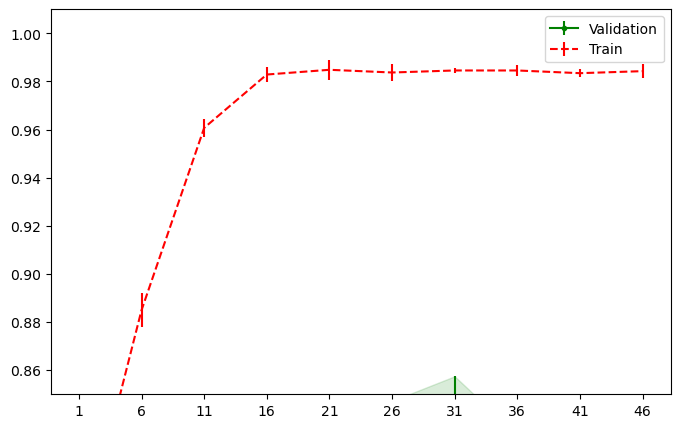

In [37]:
plt.figure(figsize=(8,5))


# plot validation accuracy
plt.errorbar(nlist, test_resRF['mean'], test_resRF['std'], fmt='g.-', label='Validation')
plt.fill_between(nlist, test_resRF['mean']+test_resRF['std'], test_resRF['mean']-test_resRF['std'],
                 alpha=0.15, color='g')

# plot training accuracy
plt.errorbar(nlist, train_resRF['mean'], train_resRF['std'], fmt='r--', label='Train')

plt.xticks(nlist, nlist)
plt.ylim(0.85,1.01)
plt.legend();


In [38]:
test_resRF['mean']

array([0.78222334, 0.81034461, 0.81589354, 0.82156801, 0.81481388,
       0.81487038, 0.81147448, 0.81480761, 0.81142427, 0.79799761])

## Predicting

In [39]:
RFmodel = RandomForestClassifier()
finXtrain, finXtest, finytrain, finytest = train_test_split(X_train,Y_train)
RFmodel.fit(finXtrain,finytrain)
yRF_pred = RFmodel.predict(X_test)

In [40]:
Predictions = pd.DataFrame(dfT["PassengerId"])
#Predictions.rename(columns = {0: ""}, inplace = True)
Predictions.insert(1, "Survived", yRF_pred)

In [41]:
Predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [42]:
Predictions.to_csv('Titanic_submission.csv', index = False)